In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
CFD = pd.read_csv('CFD_Data_DP_CSV.csv')

In [3]:
CFD

,l/L,h/H,A2/A3,B,DP
0,0.70,0.4,0.6,40,19.4100
1,0.70,0.5,0.8,35,20.2076
2,0.70,0.6,1.0,30,20.7224
3,0.85,0.4,0.8,30,19.5900
4,0.85,0.5,1.0,40,19.4400
5,0.85,0.6,0.6,35,20.2460
6,1.00,0.4,1.0,35,20.1309
7,1.00,0.5,0.6,30,21.7067
8,1.00,0.6,0.8,40,19.5079


In [4]:
CFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
l/L      9 non-null float64
h/H      9 non-null float64
A2/A3    9 non-null float64
B        9 non-null int64
DP       9 non-null float64
dtypes: float64(4), int64(1)
memory usage: 432.0 bytes


In [5]:
CFD.describe()

,l/L,h/H,A2/A3,B,DP
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.850000,0.500000,0.800000,35.000000,20.106833
std,0.129904,0.086603,0.173205,4.330127,0.752054
min,0.700000,0.400000,0.600000,30.000000,19.410000
25%,0.700000,0.400000,0.600000,30.000000,19.507900
50%,0.850000,0.500000,0.800000,35.000000,20.130900
75%,1.000000,0.600000,1.000000,40.000000,20.246000
max,1.000000,0.600000,1.000000,40.000000,21.706700


In [6]:
CFD.corr()

,l/L,h/H,A2/A3,B,DP
l/L,1.000000e+00,0.000000e+00,-3.854941e-18,0.000000e+00,0.192980
h/H,0.000000e+00,1.000000e+00,-2.312965e-17,0.000000e+00,0.258215
A2/A3,-3.854941e-18,-2.312965e-17,1.000000e+00,5.551115e-17,-0.205244
B,0.000000e+00,0.000000e+00,5.551115e-17,1.000000e+00,-0.702674
DP,1.929802e-01,2.582153e-01,-2.052441e-01,-7.026742e-01,1.000000


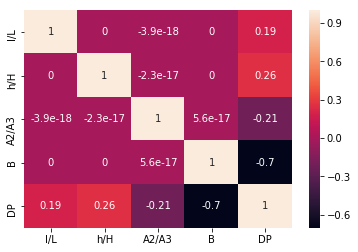

In [7]:
sns.heatmap(CFD.corr(),annot=True)

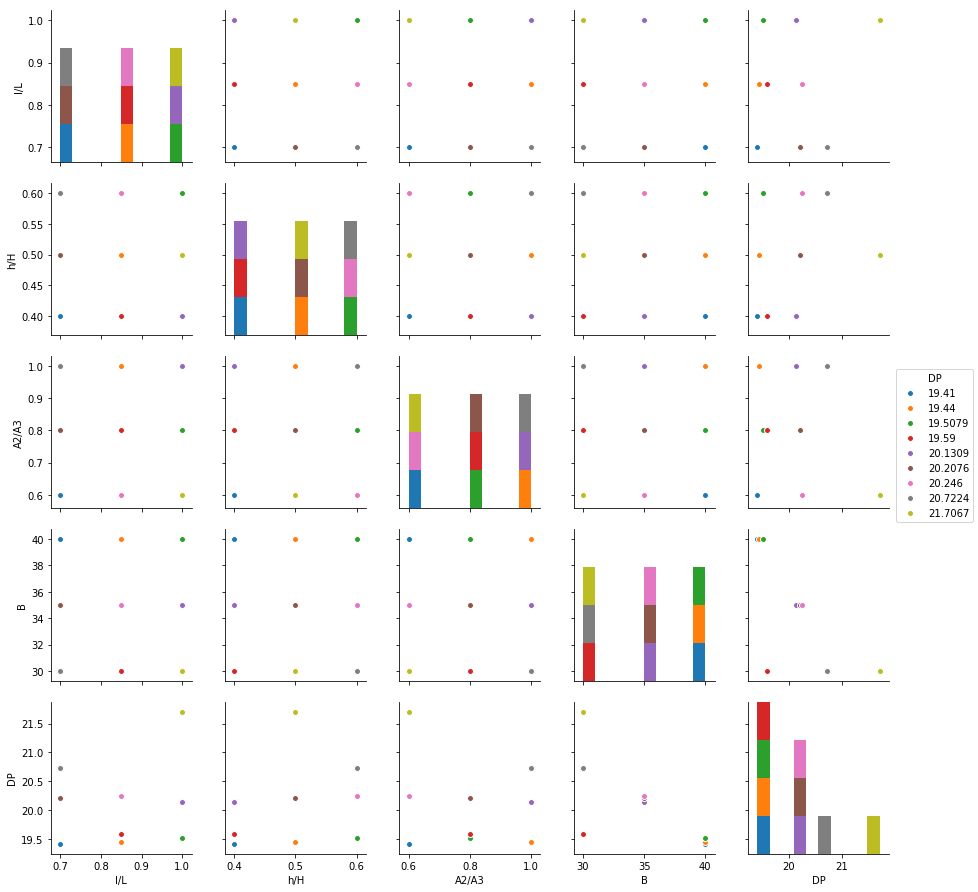

In [8]:
sns.pairplot(CFD,hue='DP')

/anaconda3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


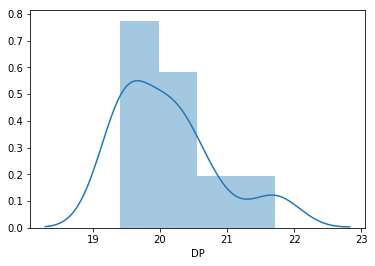

In [9]:
sns.distplot(CFD['DP'])

In [10]:
CFD.columns

Index([u'l/L', u'h/H', u'A2/A3', u'B', u'DP'], dtype='object')

In [11]:
X = CFD[['l/L','h/H','A2/A3','B']]
y = CFD['DP']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

## Creating and Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

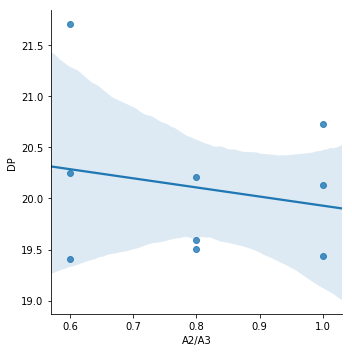

In [17]:
sns.lmplot(x='A2/A3',y='DP',data=CFD)

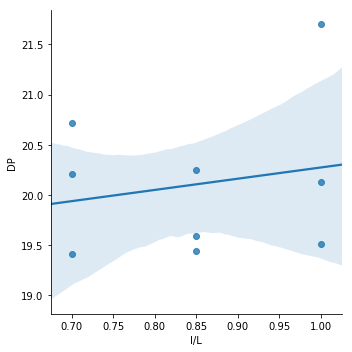

In [18]:
sns.lmplot(x='l/L',y='DP',data=CFD)

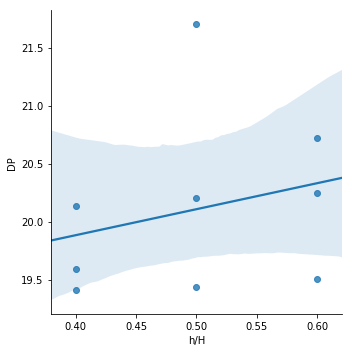

In [19]:
sns.lmplot(x='h/H',y='DP',data=CFD)

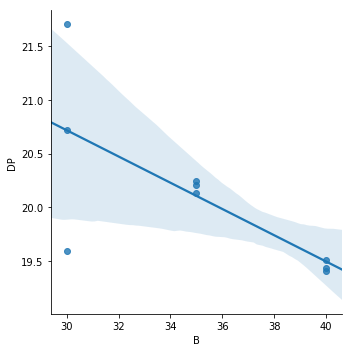

In [20]:
sns.lmplot(x='B',y='DP',data=CFD)

In [21]:
# print the intercept
print(lm.intercept_)

23.4642753968


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
l/L,0.377365
h/H,3.352119
A2/A3,-1.446060
B,-0.122040


In [23]:
predictions = lm.predict(X_test)

In [24]:
X_test

,l/L,h/H,A2/A3,B
6,1.0,0.4,1.0,35


In [25]:
predictions

array([ 19.46502857])

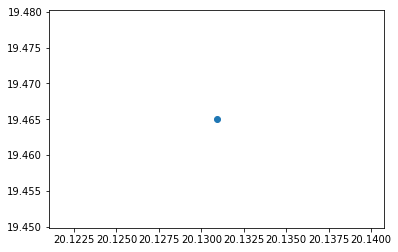

In [26]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/anaconda3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python2.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


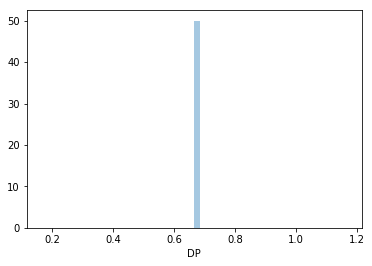

In [27]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 0.66587142857142823)
('MSE:', 0.44338475938775462)
('RMSE:', 0.66587142857142823)


In [30]:
X_test_1 = pd.read_csv('CFD_Test_CSV.csv')

In [31]:
X_test_1

,l/L,h/H,A2/A3,B
0,0.70,0.4,0.6,30
1,0.85,0.5,0.8,35
2,1.00,0.6,1.0,40
3,0.90,0.7,0.5,25
4,0.95,0.8,0.4,20
5,1.00,0.9,0.3,15


In [32]:
predictions1 = lm.predict(X_test_1)

In [33]:
predictions1

array([ 20.54044286,  20.03284762,  19.52525238,  22.37635754,
        23.48524365,  24.59412976])